In [2]:
import pandas as pd
import numpy as np
from pandas import Series
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
import pandas as pd
import numpy as np
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
renewable_en_list = pd.read_csv("C:/Users/User/modern-renewable-prod.csv",encoding = 'euc-kr')

In [4]:
renewable_en_list

,Entity,Code,Year,wind (TWh),hydro (TWh),solar (TWh),ETC with Bio (TWh)
0,Afghanistan,AFG,2000,0.0,0.31,0.00,0.00
1,Afghanistan,AFG,2001,0.0,0.50,0.00,0.00
2,Afghanistan,AFG,2002,0.0,0.56,0.00,0.00
3,Afghanistan,AFG,2003,0.0,0.63,0.00,0.00
4,Afghanistan,AFG,2004,0.0,0.56,0.00,0.00
...,...,...,...,...,...,...,...
7990,Zimbabwe,ZWE,2016,0.0,2.95,0.01,0.36
7991,Zimbabwe,ZWE,2017,0.0,3.93,0.01,0.32
7992,Zimbabwe,ZWE,2018,0.0,5.00,0.01,0.39
7993,Zimbabwe,ZWE,2019,0.0,7.26,0.01,0.38


In [5]:
country_lst = renewable_en_list[renewable_en_list.notna()]
country_lst = country_lst.drop("Code", axis = 1).set_index("Year")
country_lst

,Entity,wind (TWh),hydro (TWh),solar (TWh),ETC with Bio (TWh)
Year,,,,,
2000,Afghanistan,0.0,0.31,0.00,0.00
2001,Afghanistan,0.0,0.50,0.00,0.00
2002,Afghanistan,0.0,0.56,0.00,0.00
2003,Afghanistan,0.0,0.63,0.00,0.00
2004,Afghanistan,0.0,0.56,0.00,0.00
...,...,...,...,...,...
2016,Zimbabwe,0.0,2.95,0.01,0.36
2017,Zimbabwe,0.0,3.93,0.01,0.32
2018,Zimbabwe,0.0,5.00,0.01,0.39


In [6]:
world_lst = renewable_en_list.loc[renewable_en_list["Entity"] == "World"]
world_lst = world_lst.set_index('Year').drop(["Entity", "Code"], axis = 1)
world_lst

,wind (TWh),hydro (TWh),solar (TWh),ETC with Bio (TWh)
Year,,,,
1965,0.000,923.198,0.000,17.985
1966,0.000,983.817,0.000,19.806
1967,0.000,1005.743,0.000,19.987
1968,0.000,1059.289,0.000,22.120
1969,0.000,1121.743,0.000,23.258
1970,0.000,1174.648,0.000,25.693
1971,0.000,1227.065,0.000,27.879
1972,0.000,1284.630,0.000,29.877
1973,0.000,1303.009,0.000,32.085


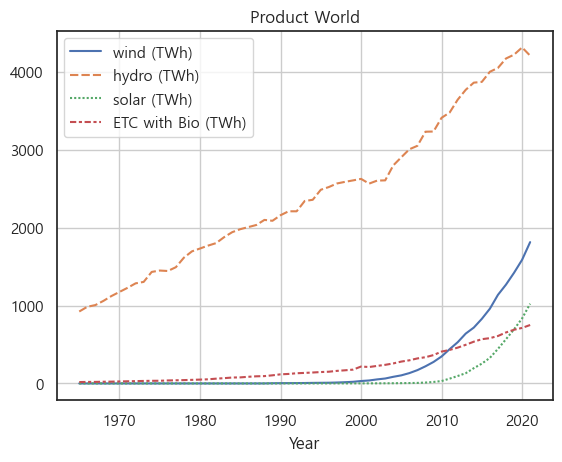

In [26]:
sns.lineplot(data = world_lst) 
plt.grid(True)
plt.title("Product World")
plt.savefig('pro_world.png', transparent = True)

In [11]:
df12 = world_lst.iloc[-1].to_frame()
# df12.set_index
df12

,2021
wind (TWh),1813.70
hydro (TWh),4206.14
solar (TWh),1023.10
ETC with Bio (TWh),749.99


In [28]:
name = ['wind (TWh)','hydro (TWh)','solar (TWh)','ETC with Bio (TWh)']
fig = px.pie(df12 ,values = 2021, names = name,
            color_discrete_sequence=px.colors.sequential.ice_r,
            hole=.6) 
fig.show()
plt.savefig('pro_world_rat.png')


<Figure size 640x480 with 0 Axes>

In [15]:
# entity = renewable_en_list.drop('Year', axis = 1)
isna_ren = renewable_en_list[renewable_en_list['Code'].isna()]
isna_ren.set_index('Entity', inplace = True)

In [16]:
cont_lst= isna_ren.loc[['Africa','Middle Africa','Western Africa',
                               'Asia','Asia Pacific','Middle East',
                               'Europe',
                            'North America','South America',
                             'Oceania']]
cont_lst

,Code,Year,wind (TWh),hydro (TWh),solar (TWh),ETC with Bio (TWh)
Entity,,,,,,
Africa,NaN,2000,0.23,74.51,0.00,2.58
Africa,NaN,2001,0.46,81.21,0.00,2.62
Africa,NaN,2002,0.43,83.40,0.02,2.52
Africa,NaN,2003,0.61,81.69,0.02,2.79
Africa,NaN,2004,0.78,86.54,0.02,3.26
...,...,...,...,...,...,...
Oceania,NaN,2016,14.59,42.61,6.38,11.58
Oceania,NaN,2017,14.74,42.82,8.27,11.62
Oceania,NaN,2018,17.28,43.72,10.17,11.71


In [35]:
cont_lst1 = cont_lst.drop("Code", axis = 1)
cont_lst1 = cont_lst1.reset_index().set_index('Year')
cont_lst_africa = cont_lst1.loc[cont_lst1['Entity']== 'Africa']
cont_lst_Middleafrica = cont_lst1.loc[cont_lst1['Entity']== 'Middle Africa']
cont_lst_Westernafrica = cont_lst1.loc[cont_lst1['Entity']== 'Western Africa']
cont_lst_asia = cont_lst1.loc[cont_lst1['Entity'] == 'Asia']
cont_lst_middleeast = cont_lst1.loc[cont_lst1['Entity'] == 'Middle East']
cont_lst_asiapacific = cont_lst1.loc[cont_lst1['Entity'] == 'Asia Pacific']
cont_lst_europe = cont_lst1.loc[cont_lst1['Entity'] == 'Europe']
cont_lst_Namerica = cont_lst1.loc[cont_lst1['Entity'] == 'North America']
cont_lst_Samerica = cont_lst1.loc[cont_lst1['Entity'] == 'South America']
cont_lst_Oceania = cont_lst1.loc[cont_lst1['Entity'] == 'Oceania']

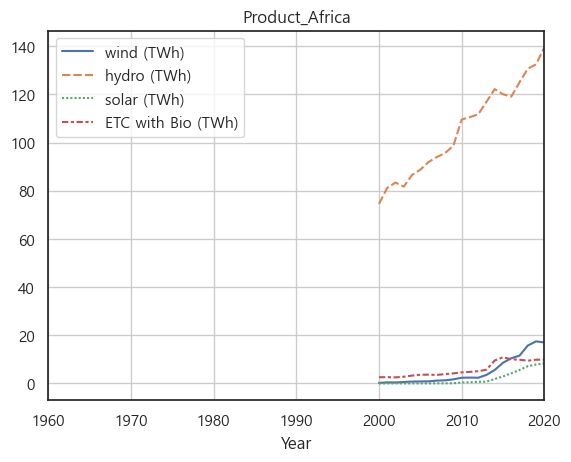

In [42]:
sns.lineplot(data = cont_lst_africa)
plt.title("Product_Africa")
plt.grid(True)
plt.xlim(1960, 2020)
plt.savefig('af_pro.png', transparent = True)

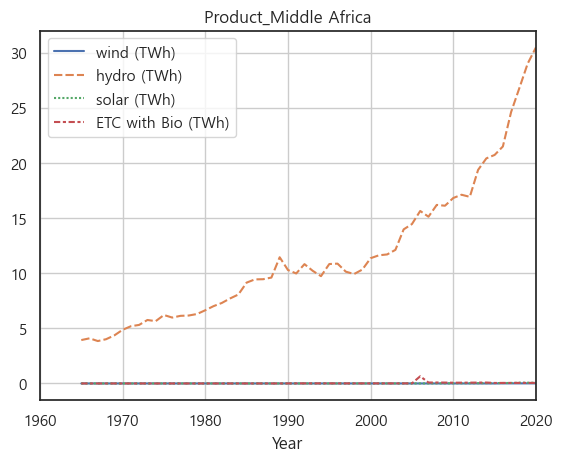

In [43]:
sns.lineplot(data = cont_lst_Middleafrica)
plt.title("Product_Middle Africa")
plt.grid(True)
plt.xlim(1960, 2020)
plt.savefig('middleaf_pro.png', transparent = True)

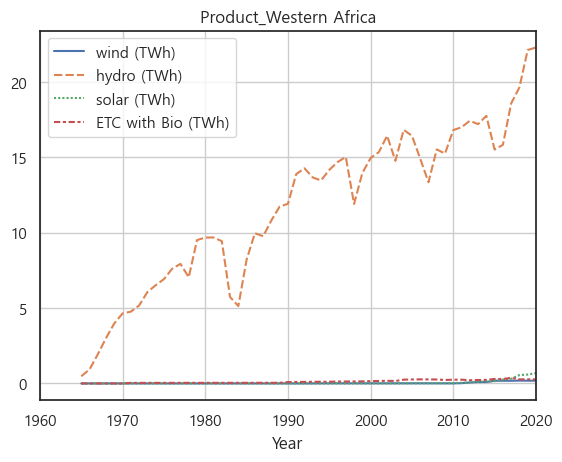

In [44]:
sns.lineplot(data = cont_lst_Westernafrica)
plt.title("Product_Western Africa")
plt.grid(True)
plt.xlim(1960, 2020)
plt.savefig('westaf_pro.png', transparent = True)

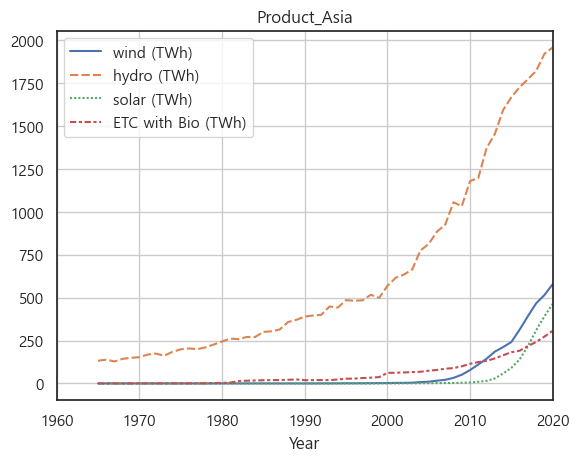

In [36]:
sns.lineplot(data = cont_lst_asia)
plt.title("Product_Asia")
plt.grid(True)
plt.xlim(1960, 2020)
plt.savefig('Asia_pro.png', transparent = True)

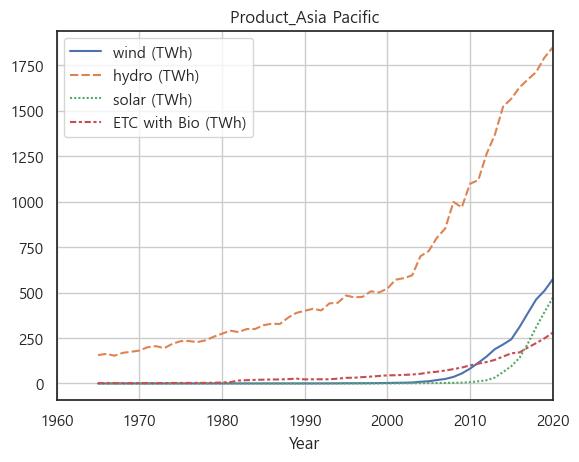

In [37]:
sns.lineplot(data = cont_lst_asiapacific)
plt.title("Product_Asia Pacific")
plt.grid(True)
plt.xlim(1960, 2020)
plt.savefig('AsiaParcific_pro.png', transparent = True)

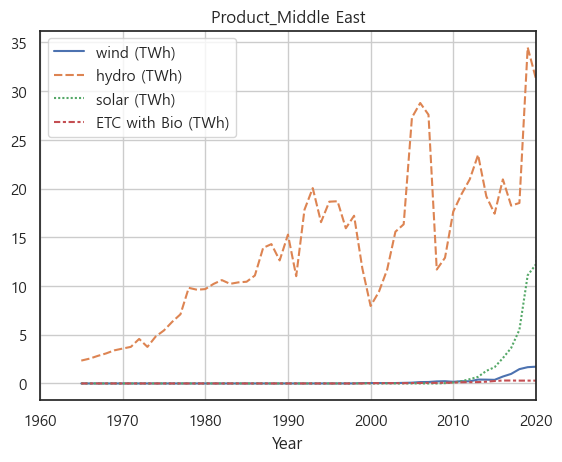

In [38]:
sns.lineplot(data = cont_lst_middleeast)
plt.title("Product_Middle East")
plt.grid(True)
plt.xlim(1960, 2020)
plt.savefig('MiddleEast_pro.png', transparent = True)

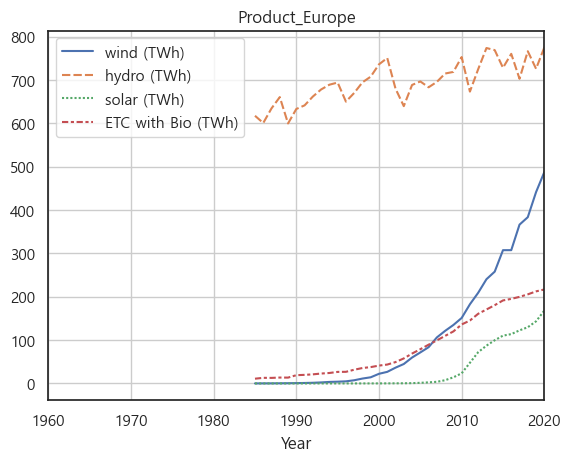

In [39]:
sns.lineplot(data = cont_lst_europe)
plt.title("Product_Europe")
plt.grid(True)
plt.xlim(1960, 2020)
plt.savefig('Europe_pro.png', transparent = True)

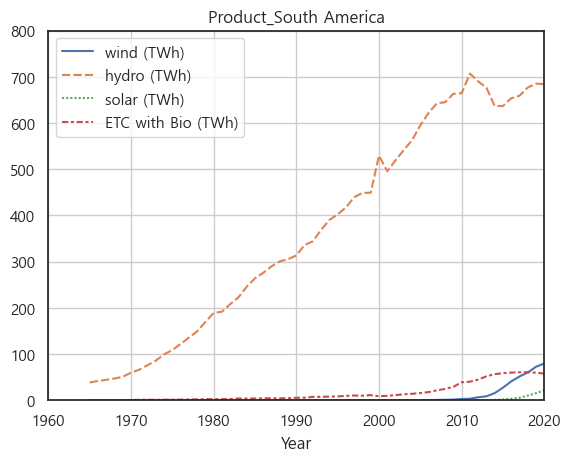

In [46]:
sns.lineplot(data = cont_lst_Samerica)
plt.title("Product_South America")
plt.grid(True)
plt.xlim(1960, 2020)
plt.ylim(0, 800)
plt.savefig('South America.png', transparent = True)

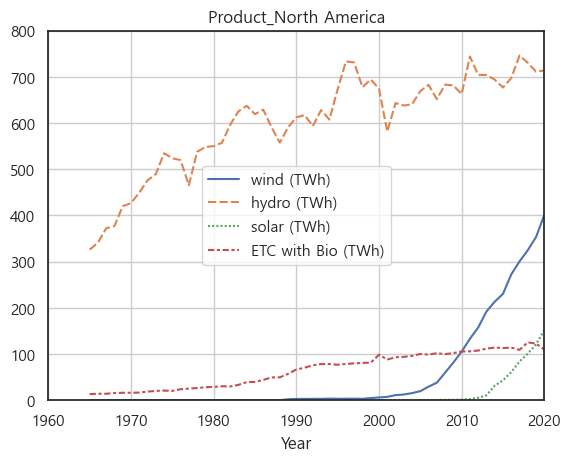

In [47]:
sns.lineplot(data = cont_lst_Namerica)
plt.title("Product_North America")
plt.grid(True)
plt.xlim(1960, 2020)
plt.ylim(0, 800)
plt.savefig('North America.png', transparent = True)

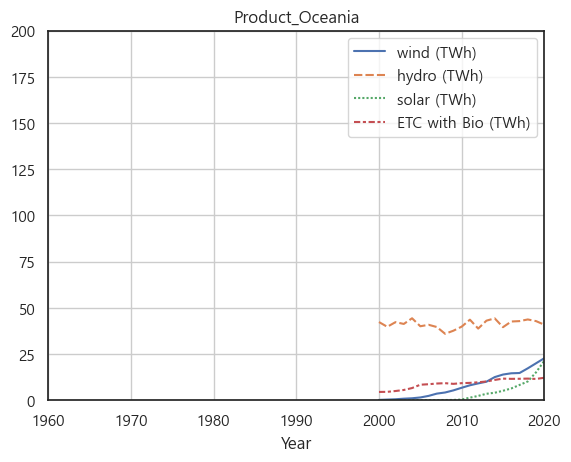

In [49]:
sns.lineplot(data = cont_lst_Oceania)
plt.title("Product_Oceania")
plt.grid(True)
plt.xlim(1960, 2020)
plt.ylim(0, 200)
plt.savefig('oceania.png', transparent = True)